<a href="https://colab.research.google.com/github/Monisha09-ds/-/blob/main/Climate_Change_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


In [32]:
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv("/content/GlobalLandTemperaturesByCountry.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [34]:
df.shape

(577462, 4)

In [35]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [36]:
df.dropna(how="any",axis=0)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [37]:
df.shape

(577462, 4)

In [38]:
df["Date"]=pd.to_datetime(df.dt)
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=577462, freq=None)

In [39]:
df.sample(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,,
1888-04-01,1888-04-01,25.589,0.899,Nicaragua
1985-07-01,1985-07-01,27.884,0.333,Guadeloupe
1926-10-01,1926-10-01,27.154,0.505,Saint Lucia
1961-09-01,1961-09-01,25.942,0.353,Egypt
1854-03-01,1854-03-01,1.058,1.156,Poland
1841-04-01,1841-04-01,NaN,NaN,Saint Kitts And Nevis
1993-03-01,1993-03-01,26.905,0.781,Christmas Island
1882-11-01,1882-11-01,NaN,NaN,Mayotte
1924-08-01,1924-08-01,28.917,0.573,Bahamas


In [40]:
df.sample(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,,
1960-12-01,1960-12-01,13.347,0.374,Jordan
1849-10-01,1849-10-01,28.475,1.448,United Arab Emirates
1884-05-01,1884-05-01,21.939,0.905,Tonga
1892-10-01,1892-10-01,21.472,0.768,Reunion
1874-08-01,1874-08-01,15.447,0.435,Germany
1871-02-01,1871-02-01,11.902,1.877,Malta
1872-05-01,1872-05-01,14.994,0.923,Italy
1911-10-01,1911-10-01,24.971,0.748,Côte D'Ivoire
1801-03-01,1801-03-01,19.813,1.761,Algeria


In [41]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [42]:
df.rename(columns={"AverageTemperature":"Avg_temp",'AverageTemperatureUncertainty':'Confidence_inter_temp'},inplace =True)

In [43]:
df.head()

,dt,Avg_temp,Confidence_inter_temp,Country
Date,,,,
1743-11-01,1743-11-01,4.384,2.294,Åland
1743-12-01,1743-12-01,NaN,NaN,Åland
1744-01-01,1744-01-01,NaN,NaN,Åland
1744-02-01,1744-02-01,NaN,NaN,Åland
1744-03-01,1744-03-01,NaN,NaN,Åland


In [44]:
df.describe()

,Avg_temp,Confidence_inter_temp
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [45]:
df.columns

Index(['dt', 'Avg_temp', 'Confidence_inter_temp', 'Country'], dtype='object')

In [46]:
df["Year"]=df.index.year
df.head()

,dt,Avg_temp,Confidence_inter_temp,Country,Year
Date,,,,,
1743-11-01,1743-11-01,4.384,2.294,Åland,1743
1743-12-01,1743-12-01,NaN,NaN,Åland,1743
1744-01-01,1744-01-01,NaN,NaN,Åland,1744
1744-02-01,1744-02-01,NaN,NaN,Åland,1744
1744-03-01,1744-03-01,NaN,NaN,Åland,1744


In [47]:
df.describe()

,Avg_temp,Confidence_inter_temp,Year
count,544811.000000,545550.000000,577462.000000
mean,17.193354,1.019057,1908.819188
std,10.953966,1.201930,65.916942
min,-37.658000,0.052000,1743.000000
25%,10.025000,0.323000,1862.000000
50%,20.901000,0.571000,1914.000000
75%,25.814000,1.206000,1964.000000
max,38.842000,15.003000,2013.000000


In [48]:
df_up=df.loc['1980':'2013']
df_up.head()


,dt,Avg_temp,Confidence_inter_temp,Country,Year
Date,,,,,
1980-01-01,1980-01-01,-4.073,0.518,Åland,1980
1980-02-01,1980-02-01,-6.484,0.441,Åland,1980
1980-03-01,1980-03-01,-3.947,0.466,Åland,1980
1980-04-01,1980-04-01,2.928,0.597,Åland,1980
1980-05-01,1980-05-01,6.154,0.241,Åland,1980


In [49]:
df_up.columns

Index(['dt', 'Avg_temp', 'Confidence_inter_temp', 'Country', 'Year'], dtype='object')

In [50]:
df_up[['Avg_temp','Country']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Greenland,-17.811693
Denmark,-17.278000
Svalbard And Jan Mayen,-6.585450
Russia,-4.396671
Canada,-4.019440
...,...
Senegal,28.634114
Burkina Faso,28.689507
Mali,29.103579


In [55]:
resamp_df=df_up[['Avg_temp']].resample('A').mean()

In [56]:
resamp_df

,Avg_temp
Date,
1980-12-31,18.853321
1981-12-31,18.916136
1982-12-31,18.852169
1983-12-31,19.094044
1984-12-31,18.764961
1985-12-31,18.699131
1986-12-31,18.801152
1987-12-31,19.051045
1988-12-31,19.111679


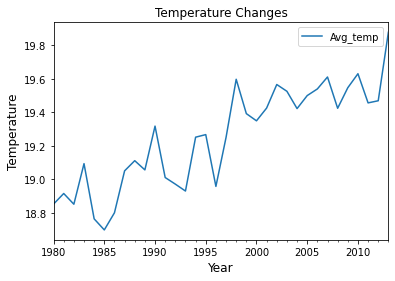

In [57]:
resamp_df.plot(title="Temperature Changes")
plt.xlabel('Year',fontsize=12)
plt.ylabel('Temperature',fontsize=12)
plt.legend()

In [59]:
from statsmodels.tsa.stattools import adfuller
print("Dicky Fuller Test Results")
test_df=adfuller(resamp_df.iloc[:,0].values,autolag="AIC")
df_out=pd.Series(test_df[0:4],index=["Test Statistics","p-value","Lags used","number of observation used"])
for key ,value in test_df[4].items():
  df_out["Critical Values (%s)"%key]=value
print(df_out)

Dicky Fuller Test Results
Test Statistics               -0.209246
p-value                        0.937411
Lags used                      3.000000
number of observation used    30.000000
Critical Values (1%)          -3.669920
Critical Values (5%)          -2.964071
Critical Values (10%)         -2.621171
dtype: float64


In [60]:
#Decomposition

In [61]:
decomp=seasonal_decompose(resamp_df,freq=3)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

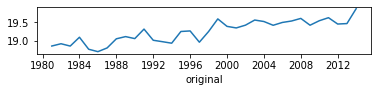

<Figure size 432x360 with 0 Axes>

In [63]:
plt.subplot(411)
plt.plot(resamp_df)
plt.xlabel("original")
plt.figure(figsize=(6,5))

plt.tight_layout()